In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dtype_dict = {
    'id_mutation': 'str',
    'date_mutation': 'str',
    'numero_disposition': 'str',
    'nature_mutation': 'str',
    'valeur_fonciere': 'float64',
    'adresse_numero': 'float64',
    'adresse_suffixe': 'str',
    'adresse_nom_voie': 'str',
    'adresse_code_voie': 'str',
    'code_postal': 'str',
    'code_commune': 'str',
    'nom_commune': 'str',
    'code_departement': 'str',
    'ancien_code_commune': 'str',
    'ancien_nom_commune': 'str',
    'id_parcelle': 'str',
    'ancien_id_parcelle': 'str',
    'numero_volume': 'str',
    'lot1_numero': 'str',
    'lot1_surface_carrez': 'float64',
    'lot2_numero': 'str',
    'lot2_surface_carrez': 'float64',
    'lot3_numero': 'str',
    'lot3_surface_carrez': 'float64',
    'lot4_numero': 'str',
    'lot4_surface_carrez': 'float64',
    'lot5_numero': 'str',
    'lot5_surface_carrez': 'float64',
    'nombre_lots': 'int32',
    'code_type_local': 'str',
    'type_local': 'str',
    'surface_reelle_bati': 'float64',
    'nombre_pieces_principales': 'float64',
    'code_nature_culture': 'str',
    'nature_culture': 'str',
    'code_nature_culture_speciale': 'str',
    'nature_culture_speciale': 'str',
    'surface_terrain': 'float64',
    'longitude': 'float64',
    'latitude': 'float64'
}

In [3]:
data = pd.read_csv("data/full_2022.csv",dtype=dtype_dict)
data = data.dropna(subset=['longitude', 'latitude'])
data = data.drop_duplicates()

In [4]:
code = pd.read_excel('data\insee_rp_hist_1968.xlsx')
code

,codgeo,libgeo,an,p_pop
0,01001,L'Abergement-Clémenciat,2020,806.0
1,01002,L'Abergement-de-Varey,2020,262.0
2,01004,Ambérieu-en-Bugey,2020,14288.0
3,01005,Ambérieux-en-Dombes,2020,1782.0
4,01006,Ambléon,2020,113.0
...,...,...,...,...
34940,97613,M'Tsangamouji,2020,NaN
34941,97614,Ouangani,2020,NaN
34942,97615,Pamandzi,2020,NaN
34943,97616,Sada,2020,NaN


In [5]:
data["nature_mutation"].unique()

array(['Vente', "Vente en l'état futur d'achèvement", 'Echange',
       'Vente terrain à bâtir', 'Adjudication', 'Expropriation'],
      dtype=object)

In [6]:
sampled_data = data
sampled_data = sampled_data[sampled_data["nature_mutation"].isin(["Vente","Vente en l'état futur d'achèvement"])]
sampled_data = sampled_data[(sampled_data["nombre_lots"] == 0) | (sampled_data["nombre_lots"] == 1)]
sampled_data = sampled_data[(sampled_data['surface_reelle_bati'].notna()) & (sampled_data['surface_reelle_bati'] != 0)]
sampled_data = sampled_data[(sampled_data['valeur_fonciere'].notna()) & (sampled_data['valeur_fonciere'] != 0)]
sampled_data['code_departement'] = sampled_data['code_departement'].replace(['2A', '2B'], '02')


In [7]:
sampled_data = sampled_data.dropna(subset=['valeur_fonciere'])
columns_to_drop = ["lot1_numero", "lot2_numero", "lot3_numero", "lot4_numero", "lot5_numero","ancien_code_commune",
                   "ancien_nom_commune","adresse_numero","adresse_suffixe","id_parcelle","ancien_id_parcelle","code_type_local",
                   "numero_volume","code_nature_culture_speciale","nature_culture_speciale","code_nature_culture",
                   "code_nature_culture","numero_disposition","id_mutation","lot2_surface_carrez","lot3_surface_carrez","lot4_surface_carrez",
                   "lot5_surface_carrez","adresse_nom_voie","adresse_code_voie","nom_commune","nombre_lots",
                   "lot1_surface_carrez","nature_culture","code_postal"]
    #"code_commune"
sampled_data = sampled_data.drop(columns=columns_to_drop)

In [8]:
sampled_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1220352 entries, 0 to 4617578
Data columns (total 11 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   date_mutation              1220352 non-null  object 
 1   nature_mutation            1220352 non-null  object 
 2   valeur_fonciere            1220352 non-null  float64
 3   code_commune               1220352 non-null  object 
 4   code_departement           1220352 non-null  object 
 5   type_local                 1220352 non-null  object 
 6   surface_reelle_bati        1220352 non-null  float64
 7   nombre_pieces_principales  1220352 non-null  float64
 8   surface_terrain            871221 non-null   float64
 9   longitude                  1220352 non-null  float64
 10  latitude                   1220352 non-null  float64
dtypes: float64(6), object(5)
memory usage: 111.7+ MB


In [9]:
sampled_data['latitude'] = sampled_data['latitude'].astype(float)
sampled_data['longitude'] = sampled_data['longitude'].astype(float)


sampled_data["surface_terrain"] = sampled_data["surface_terrain"].fillna(0)

sampled_data["valeur_fonciere"] = sampled_data["valeur_fonciere"].astype(str).apply(lambda x: x.replace(",", ".")).astype(float)

sampled_data["Prix_m"] = sampled_data["valeur_fonciere"] / sampled_data["surface_reelle_bati"]
sampled_data["Prix_m"] = sampled_data["Prix_m"].apply(lambda x: round(x))

sampled_data['latitude_r'] = np.deg2rad(sampled_data['latitude'])
sampled_data['longitude_r'] = np.deg2rad(sampled_data['longitude'])
sampled_data=sampled_data[sampled_data.latitude.notna()]
sampled_data=sampled_data[sampled_data.code_departement.notna()]

sampled_data=sampled_data.sort_values(by = ['latitude','longitude'])
sampled_data=sampled_data.drop(columns=['latitude','longitude'])
sampled_data=sampled_data.reset_index(drop=True)


In [10]:
sampled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220352 entries, 0 to 1220351
Data columns (total 12 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   date_mutation              1220352 non-null  object 
 1   nature_mutation            1220352 non-null  object 
 2   valeur_fonciere            1220352 non-null  float64
 3   code_commune               1220352 non-null  object 
 4   code_departement           1220352 non-null  object 
 5   type_local                 1220352 non-null  object 
 6   surface_reelle_bati        1220352 non-null  float64
 7   nombre_pieces_principales  1220352 non-null  float64
 8   surface_terrain            1220352 non-null  float64
 9   Prix_m                     1220352 non-null  int64  
 10  latitude_r                 1220352 non-null  float64
 11  longitude_r                1220352 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 111.7+ MB


In [11]:
sampled_data = sampled_data[sampled_data['Prix_m'] <= 75000]

In [12]:
def filter_outliers(df):
    grouped = df.groupby('code_departement')

    def filter_group(group):
        Q1 = group['Prix_m'].quantile(0.25)
        Q3 = group['Prix_m'].quantile(0.75)
        IQR = Q3 - Q1
        return group[(group['Prix_m'] >= (Q1 - 1.5 * IQR)) & (group['Prix_m'] <= (Q3 + 1.5 * IQR))]

    return grouped.apply(filter_group).reset_index(drop=True)

sampled_data = filter_outliers(sampled_data)


In [13]:
sampled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087075 entries, 0 to 1087074
Data columns (total 12 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   date_mutation              1087075 non-null  object 
 1   nature_mutation            1087075 non-null  object 
 2   valeur_fonciere            1087075 non-null  float64
 3   code_commune               1087075 non-null  object 
 4   code_departement           1087075 non-null  object 
 5   type_local                 1087075 non-null  object 
 6   surface_reelle_bati        1087075 non-null  float64
 7   nombre_pieces_principales  1087075 non-null  float64
 8   surface_terrain            1087075 non-null  float64
 9   Prix_m                     1087075 non-null  int64  
 10  latitude_r                 1087075 non-null  float64
 11  longitude_r                1087075 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 99.5+ MB


In [14]:
import pandas as pd

# Example DataFrames
# sampled_data = pd.read_csv('path_to_sampled_data.csv')
# code = pd.read_csv('path_to_code.csv')

# Merge the DataFrames
sampled_data = pd.merge(sampled_data, code[['codgeo', 'p_pop']], left_on='code_commune', right_on='codgeo', how='left')

# 'merged_data' now has the 'p_pop' column from 'code' DataFrame added to it.

sampled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087075 entries, 0 to 1087074
Data columns (total 14 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   date_mutation              1087075 non-null  object 
 1   nature_mutation            1087075 non-null  object 
 2   valeur_fonciere            1087075 non-null  float64
 3   code_commune               1087075 non-null  object 
 4   code_departement           1087075 non-null  object 
 5   type_local                 1087075 non-null  object 
 6   surface_reelle_bati        1087075 non-null  float64
 7   nombre_pieces_principales  1087075 non-null  float64
 8   surface_terrain            1087075 non-null  float64
 9   Prix_m                     1087075 non-null  int64  
 10  latitude_r                 1087075 non-null  float64
 11  longitude_r                1087075 non-null  float64
 12  codgeo                     1052188 non-null  object 
 13  p_pop       

In [15]:
sampled_data.pivot_table(values='valeur_fonciere', index='type_local', columns='nature_mutation', aggfunc='size')

nature_mutation,Vente,Vente en l'état futur d'achèvement
type_local,,
Appartement,296693,7733
Local industriel. commercial ou assimilé,77906,686
Maison,703651,406


In [16]:
# appart_old=sampled_data[(sampled_data['type_local']=='Appartement') & (sampled_data['nature_mutation']=='Vente') & (sampled_data['Prix_m']>100) & (sampled_data['valeur_fonciere']>10000)]
# appart_old.reset_index(drop=True,inplace=True)
# maison_old=sampled_data[(sampled_data['type_local']=='Maison') & (sampled_data['nature_mutation']=='Vente')]
# maison_old=maison_old[(maison_old['valeur_fonciere']>50000)&(maison_old['Prix_m']>500)&(maison_old['surface_reelle_bati']>9)]
# maison_old.reset_index(drop=True,inplace=True)
# #local_old =sampled_data[(sampled_data['type_local']=='Local industriel. commercial ou assimilé') & (sampled_data['nature_mutation']=='Vente')]
# #local_old.reset_index(drop=True,inplace=True)
# appart_new=sampled_data[(sampled_data['type_local']=='Appartement') & (sampled_data['nature_mutation']=='Vente en l\'état futur d\'achèvement')]
# appart_new.reset_index(drop=True,inplace=True)

In [17]:
# appart_old.info()

In [18]:
# all_properties = pd.concat([appart_old, maison_old])


## ALL ##

In [19]:
# from sklearn.neighbors import BallTree
# import os
# import pickle

# def save_obj(obj, name):
#     directory = "data/"
#     if not os.path.exists(directory):
#         os.makedirs(directory)

#     with open(os.path.join(directory, name + '.pkl'), 'wb') as f:
#         pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

# models = {}

# all_properties = pd.concat([appart_old, maison_old,appart_new])

# all_properties['distance_moyenne'] = np.zeros(len(all_properties))
# all_properties['indices_voisins'] = np.zeros(len(all_properties))

# model_all = BallTree(all_properties[['latitude_r', 'longitude_r']].values, leaf_size=2, metric='haversine')
# models['france_entiere'] = model_all

# save_obj(models['france_entiere'], 'france_entiere')


In [20]:
# import time
# import pandas as pd
# import os
# import numpy as np
# from sklearn.neighbors import BallTree
# import pickle
# directory = "data"
# if not os.path.exists(directory):
#     os.makedirs(directory)

# all_properties = pd.concat([appart_old, maison_old])

# all_properties['distance_moyenne'] = np.zeros(len(all_properties))
# all_properties['indices_voisins'] = np.zeros(len(all_properties))

# model_all = BallTree(all_properties[['latitude_r', 'longitude_r']].values, leaf_size=2, metric='haversine')

# all_data = []

# for property_type, data_old in [('appart', appart_old), ('maison', maison_old)]:
#     start = time.time()

#     k_nearest = min(10, len(data_old))

#     dist, indices = model_all.query(data_old[['latitude_r', 'longitude_r']].values, k=k_nearest)

#     data_old['distance_moyenne'] = np.mean(dist[:, 1:] * 6341, axis=1)

#     prix_moyen_quartier = pd.DataFrame({'Prix_m': np.zeros(len(data_old))})

#     for i in range(1, k_nearest):
#         valid_indices = indices[:, i] < len(all_properties)
#         prix_valides = all_properties.iloc[indices[valid_indices, i]]['Prix_m']
#         prix_moyen_quartier.loc[valid_indices, 'Prix_m'] += prix_valides.values

#     diviseur = max(1, k_nearest - 1)
#     prix_moyen_quartier /= diviseur
#     data_old['Prix_moyen_du_quartier'] = prix_moyen_quartier['Prix_m']

#     stop = time.time()
#     print(f"Type: {property_type}, Time taken: {stop - start} seconds")

#     all_data.append(data_old)

# combined_data = pd.concat(all_data)

# combined_csv_filename = os.path.join(directory, "combined_properties_france.csv")
# combined_data.to_csv(combined_csv_filename, index=False, header=True)

# model_filename = os.path.join(directory, "balltree_model.pkl")
# with open(model_filename, 'wb') as file:
#     pickle.dump(model_all, file)

## graph (start here) ##

In [21]:
# all = pd.read_csv("data/france_entiere/combined_properties_france.csv")

In [22]:
# Group by 'code_commune' and count the number of sales
commune_sales_count = sampled_data.groupby('code_commune').size()

# Map the count back to the original DataFrame
sampled_data['number_of_sales'] = sampled_data['code_commune'].map(commune_sales_count)

# This line is optional, to show the updated DataFrame
print(sampled_data[['code_commune', 'number_of_sales']])


        code_commune  number_of_sales
0              01058               19
1              01058               19
2              01058               19
3              01058               19
4              01058               19
...              ...              ...
1087070        97411             1904
1087071        97411             1904
1087072        97411             1904
1087073        97411             1904
1087074        97411             1904

[1087075 rows x 2 columns]


In [23]:
sampled_data = sampled_data.drop(columns=['code_commune'])
sampled_data = sampled_data.drop(columns=['codgeo'])
                     

In [24]:
sampled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087075 entries, 0 to 1087074
Data columns (total 13 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   date_mutation              1087075 non-null  object 
 1   nature_mutation            1087075 non-null  object 
 2   valeur_fonciere            1087075 non-null  float64
 3   code_departement           1087075 non-null  object 
 4   type_local                 1087075 non-null  object 
 5   surface_reelle_bati        1087075 non-null  float64
 6   nombre_pieces_principales  1087075 non-null  float64
 7   surface_terrain            1087075 non-null  float64
 8   Prix_m                     1087075 non-null  int64  
 9   latitude_r                 1087075 non-null  float64
 10  longitude_r                1087075 non-null  float64
 11  p_pop                      1052188 non-null  float64
 12  number_of_sales            1087075 non-null  int64  
dtypes: float64(7

In [25]:
# sampled_data = sampled_data.drop(["date_mutation", "nature_mutation"], axis=1)

In [26]:
sampled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087075 entries, 0 to 1087074
Data columns (total 13 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   date_mutation              1087075 non-null  object 
 1   nature_mutation            1087075 non-null  object 
 2   valeur_fonciere            1087075 non-null  float64
 3   code_departement           1087075 non-null  object 
 4   type_local                 1087075 non-null  object 
 5   surface_reelle_bati        1087075 non-null  float64
 6   nombre_pieces_principales  1087075 non-null  float64
 7   surface_terrain            1087075 non-null  float64
 8   Prix_m                     1087075 non-null  int64  
 9   latitude_r                 1087075 non-null  float64
 10  longitude_r                1087075 non-null  float64
 11  p_pop                      1052188 non-null  float64
 12  number_of_sales            1087075 non-null  int64  
dtypes: float64(7

In [27]:
from sklearn.preprocessing import OneHotEncoder
a = OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform='pandas')


In [28]:
a_transform = a.fit_transform(sampled_data[["type_local"]])

In [29]:
a_transform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087075 entries, 0 to 1087074
Data columns (total 3 columns):
 #   Column                                               Non-Null Count    Dtype  
---  ------                                               --------------    -----  
 0   type_local_Appartement                               1087075 non-null  float64
 1   type_local_Local industriel. commercial ou assimilé  1087075 non-null  float64
 2   type_local_Maison                                    1087075 non-null  float64
dtypes: float64(3)
memory usage: 24.9 MB


In [30]:
sampled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087075 entries, 0 to 1087074
Data columns (total 13 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   date_mutation              1087075 non-null  object 
 1   nature_mutation            1087075 non-null  object 
 2   valeur_fonciere            1087075 non-null  float64
 3   code_departement           1087075 non-null  object 
 4   type_local                 1087075 non-null  object 
 5   surface_reelle_bati        1087075 non-null  float64
 6   nombre_pieces_principales  1087075 non-null  float64
 7   surface_terrain            1087075 non-null  float64
 8   Prix_m                     1087075 non-null  int64  
 9   latitude_r                 1087075 non-null  float64
 10  longitude_r                1087075 non-null  float64
 11  p_pop                      1052188 non-null  float64
 12  number_of_sales            1087075 non-null  int64  
dtypes: float64(7

In [31]:
sampled_data = sampled_data.dropna()

In [32]:
sampled_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1052188 entries, 0 to 1087074
Data columns (total 13 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   date_mutation              1052188 non-null  object 
 1   nature_mutation            1052188 non-null  object 
 2   valeur_fonciere            1052188 non-null  float64
 3   code_departement           1052188 non-null  object 
 4   type_local                 1052188 non-null  object 
 5   surface_reelle_bati        1052188 non-null  float64
 6   nombre_pieces_principales  1052188 non-null  float64
 7   surface_terrain            1052188 non-null  float64
 8   Prix_m                     1052188 non-null  int64  
 9   latitude_r                 1052188 non-null  float64
 10  longitude_r                1052188 non-null  float64
 11  p_pop                      1052188 non-null  float64
 12  number_of_sales            1052188 non-null  int64  
dtypes: float64(7), in

In [33]:
sampled_data.head()

,date_mutation,nature_mutation,valeur_fonciere,code_departement,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,Prix_m,latitude_r,longitude_r,p_pop,number_of_sales
0,2022-01-27,Vente,307600.0,01,Maison,97.0,5.0,726.0,3171,0.796178,0.098314,819.0,19
1,2022-09-01,Vente,220000.0,01,Maison,84.0,4.0,365.0,2619,0.796183,0.098341,819.0,19
2,2022-01-21,Vente,234900.0,01,Maison,100.0,4.0,820.0,2349,0.796197,0.098315,819.0,19
3,2022-01-21,Vente,234900.0,01,Maison,100.0,4.0,807.0,2349,0.796197,0.098315,819.0,19
4,2022-02-17,Vente,88000.0,01,Maison,80.0,3.0,167.0,1100,0.796202,0.098232,819.0,19


In [34]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming your DataFrame is named 'all'
# # Replace 'all' with the actual name of your DataFrame if it's different
# correlation_matrix = sampled_data.corr()

# # Set up the matplotlib figure
# plt.figure(figsize=(12, 8))

# # Draw the heatmap
# sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# # Show the plot
# plt.show()

In [35]:
appart_old=sampled_data[(sampled_data['type_local']=='Appartement') & (sampled_data['nature_mutation']=='Vente') & (sampled_data['Prix_m']>100) & (sampled_data['valeur_fonciere']>10000)]
appart_old.reset_index(drop=True,inplace=True)
maison_old=sampled_data[(sampled_data['type_local']=='Maison') & (sampled_data['nature_mutation']=='Vente')]
maison_old=maison_old[(maison_old['valeur_fonciere']>50000)&(maison_old['Prix_m']>500)&(maison_old['surface_reelle_bati']>9)]
maison_old.reset_index(drop=True,inplace=True)
#local_old =sampled_data[(sampled_data['type_local']=='Local industriel. commercial ou assimilé') & (sampled_data['nature_mutation']=='Vente')]
#local_old.reset_index(drop=True,inplace=True)
appart_new=sampled_data[(sampled_data['type_local']=='Appartement') & (sampled_data['nature_mutation']=='Vente en l\'état futur d\'achèvement')]
appart_new.reset_index(drop=True,inplace=True)

In [36]:
sampled_data = sampled_data.drop(["date_mutation", "nature_mutation"], axis=1)

In [37]:
sampled_data.head()

,valeur_fonciere,code_departement,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,Prix_m,latitude_r,longitude_r,p_pop,number_of_sales
0,307600.0,01,Maison,97.0,5.0,726.0,3171,0.796178,0.098314,819.0,19
1,220000.0,01,Maison,84.0,4.0,365.0,2619,0.796183,0.098341,819.0,19
2,234900.0,01,Maison,100.0,4.0,820.0,2349,0.796197,0.098315,819.0,19
3,234900.0,01,Maison,100.0,4.0,807.0,2349,0.796197,0.098315,819.0,19
4,88000.0,01,Maison,80.0,3.0,167.0,1100,0.796202,0.098232,819.0,19


In [38]:
sampled_data = pd.concat([sampled_data,a_transform],axis=1).drop(columns=['type_local'])


In [39]:
sampled_data.head()

,valeur_fonciere,code_departement,surface_reelle_bati,nombre_pieces_principales,surface_terrain,Prix_m,latitude_r,longitude_r,p_pop,number_of_sales,type_local_Appartement,type_local_Local industriel. commercial ou assimilé,type_local_Maison
0,307600.0,01,97.0,5.0,726.0,3171.0,0.796178,0.098314,819.0,19.0,0.0,0.0,1.0
1,220000.0,01,84.0,4.0,365.0,2619.0,0.796183,0.098341,819.0,19.0,0.0,0.0,1.0
2,234900.0,01,100.0,4.0,820.0,2349.0,0.796197,0.098315,819.0,19.0,0.0,0.0,1.0
3,234900.0,01,100.0,4.0,807.0,2349.0,0.796197,0.098315,819.0,19.0,0.0,0.0,1.0
4,88000.0,01,80.0,3.0,167.0,1100.0,0.796202,0.098232,819.0,19.0,0.0,0.0,1.0


In [40]:
import time
import pandas as pd
import os
import numpy as np
from sklearn.neighbors import BallTree
import pickle
directory = "data"
if not os.path.exists(directory):
    os.makedirs(directory)

all_properties = pd.concat([appart_old, maison_old])

all_properties['distance_moyenne'] = np.zeros(len(all_properties))
all_properties['indices_voisins'] = np.zeros(len(all_properties))

model_all = BallTree(all_properties[['latitude_r', 'longitude_r']].values, leaf_size=2, metric='haversine')

all_data = []
print(all_data)
for property_type, data_old in [('appart', appart_old), ('maison', maison_old)]:
    start = time.time()

    k_nearest = min(10, len(data_old))

    dist, indices = model_all.query(data_old[['latitude_r', 'longitude_r']].values, k=k_nearest)

    data_old['distance_moyenne'] = np.mean(dist[:, 1:] * 6341, axis=1)

    prix_moyen_quartier = pd.DataFrame({'Prix_m': np.zeros(len(data_old))})

    for i in range(1, k_nearest):
        valid_indices = indices[:, i] < len(all_properties)
        prix_valides = all_properties.iloc[indices[valid_indices, i]]['Prix_m']
        prix_moyen_quartier.loc[valid_indices, 'Prix_m'] += prix_valides.values

    diviseur = max(1, k_nearest - 1)
    prix_moyen_quartier /= diviseur
    data_old['Prix_moyen_du_quartier'] = prix_moyen_quartier['Prix_m']

    stop = time.time()
    print(f"Type: {property_type}, Time taken: {stop - start} seconds")

    all_data.append(data_old)

combined_data = pd.concat(all_data)




[]
Type: appart, Time taken: 34.95303654670715 seconds


In [ ]:
all_data = pd.concat([all_data,a_transform],axis=1).drop(columns=['type_local'])


In [ ]:
all_data.head()

In [ ]:
combined_csv_filename = os.path.join(directory, "france_entiere/combined_properties_france.csv")
combined_data.to_csv(combined_csv_filename, index=False, header=True)

model_filename = os.path.join(directory, "balltree_model.pkl")
with open(model_filename, 'wb') as file:
    pickle.dump(model_all, file)

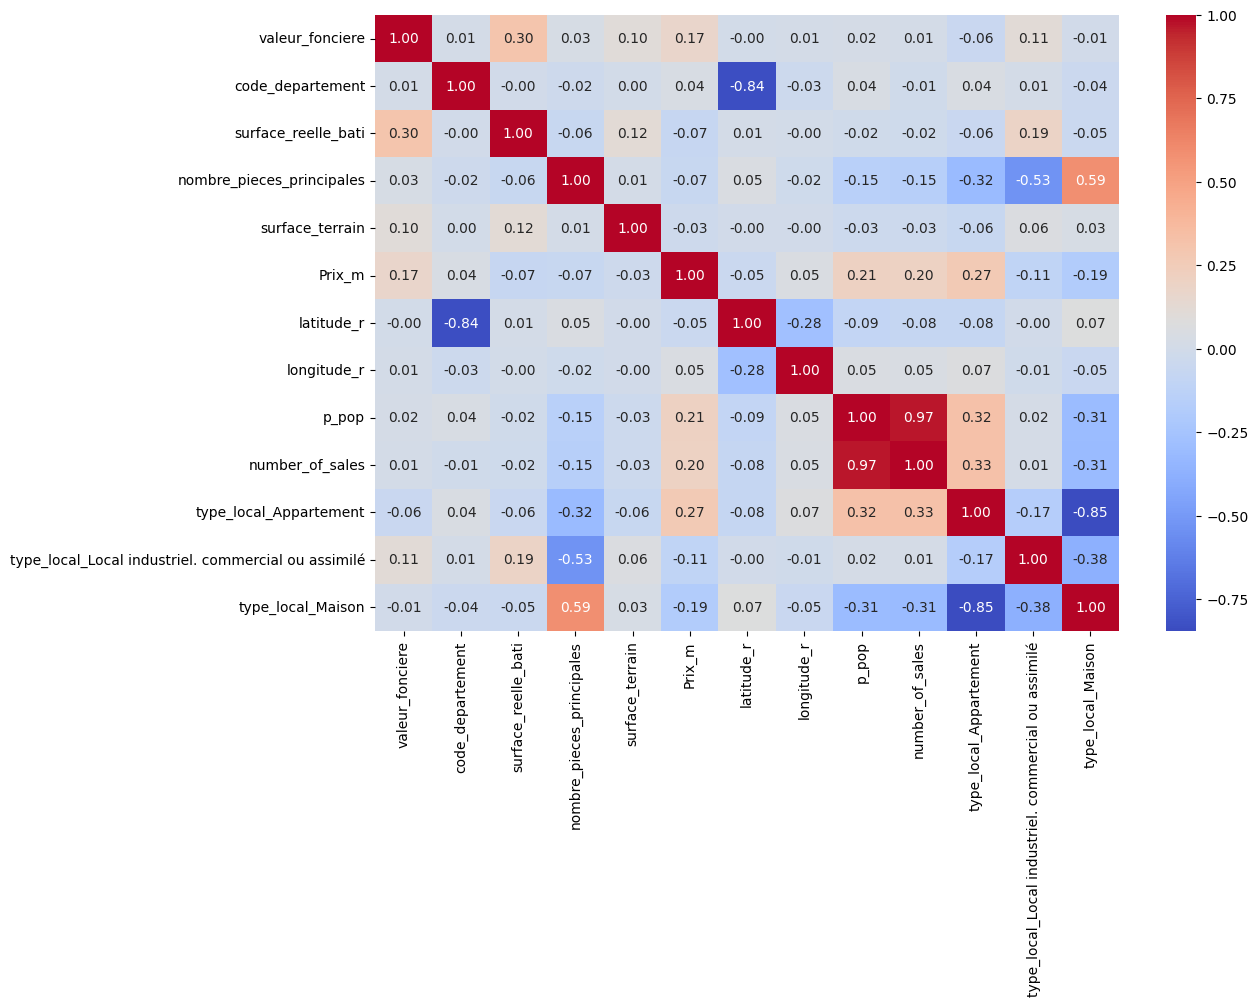

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'all'
# Replace 'all' with the actual name of your DataFrame if it's different
correlation_matrix = sampled_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Show the plot
plt.show()

In [43]:
all = pd.read_csv("data/france_entiere/combined_properties_france.csv")

In [44]:
sampled_data.head()

,valeur_fonciere,code_departement,surface_reelle_bati,nombre_pieces_principales,surface_terrain,Prix_m,latitude_r,longitude_r,p_pop,number_of_sales,type_local_Appartement,type_local_Local industriel. commercial ou assimilé,type_local_Maison
0,307600.0,01,97.0,5.0,726.0,3171.0,0.796178,0.098314,819.0,19.0,0.0,0.0,1.0
1,220000.0,01,84.0,4.0,365.0,2619.0,0.796183,0.098341,819.0,19.0,0.0,0.0,1.0
2,234900.0,01,100.0,4.0,820.0,2349.0,0.796197,0.098315,819.0,19.0,0.0,0.0,1.0
3,234900.0,01,100.0,4.0,807.0,2349.0,0.796197,0.098315,819.0,19.0,0.0,0.0,1.0
4,88000.0,01,80.0,3.0,167.0,1100.0,0.796202,0.098232,819.0,19.0,0.0,0.0,1.0


In [46]:
all = all.drop("date_mutation", axis=1)
all = all.drop("nature_mutation", axis=1)
all = all.drop("type_local", axis=1)


In [45]:
all.head()

,date_mutation,nature_mutation,valeur_fonciere,code_departement,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,Prix_m,latitude_r,longitude_r,p_pop,number_of_sales,distance_moyenne,Prix_moyen_du_quartier
0,2022-05-31,Vente,60000.0,1,Appartement,42.0,2.0,0.0,1429,0.796595,0.098218,819.0,19,0.673493,2163.222222
1,2022-04-15,Vente,490000.0,1,Appartement,100.0,4.0,883.0,4900,0.797411,0.099465,897.0,30,1.403301,2666.555556
2,2022-07-22,Vente,116750.0,1,Appartement,72.0,3.0,0.0,1622,0.797733,0.099175,1133.0,29,0.736173,2816.111111
3,2022-06-23,Vente,120000.0,1,Appartement,60.0,3.0,0.0,2000,0.797768,0.100411,959.0,12,0.400588,1932.333333
4,2022-06-23,Vente,120000.0,1,Appartement,97.0,3.0,0.0,1237,0.797768,0.100411,959.0,12,0.400588,1932.333333


In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pickle

# Separate target variable and features
y = all["Prix_m"].values
X = all.drop(columns=["valeur_fonciere", "Prix_m"]).values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the model
forest = RandomForestRegressor()

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50],
    'min_samples_split': [8],
    'max_depth': [None],
    'min_samples_leaf' :[1],
    'min_weight_fraction_leaf' :[0],
    'max_features': ['sqrt']
}

# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Extract the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Optionally, evaluate the best model on test data
#test_score = best_model.score(X_test, y_test)  # Uncomment to evaluate

# Save the scaler and the best model to disk
with open('data/scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

with open('data/model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

# Optionally, print the best parameters and the test score
print("Best Parameters:", best_params)
#print("Test Score:", test_score)  # Uncomment to print test score

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 8, 'min_weight_fraction_leaf': 0, 'n_estimators': 50}


## TEST ##

In [49]:
import pickle

with open('data/model.pkl', 'rb') as model_file:
    forest = pickle.load(model_file)

with open('data/scaler.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

In [50]:
import numpy as np
import pandas as pd
predictions = forest.predict(X_test)

y_test_adjusted = y_test  +1e-6

percentage_error = np.abs(predictions - y_test_adjusted) / y_test_adjusted * 100

high_error_indices = [i for i, error in enumerate(percentage_error) if error > 0]

high_error_predictions_scaled = X_test[high_error_indices]

high_error_predictions = scaler.inverse_transform(high_error_predictions_scaled)

columns = all.drop(columns=["valeur_fonciere", "Prix_m"]).columns
high_error_df = pd.DataFrame(high_error_predictions, columns=columns)

high_error_df['Actual'] = y_test_adjusted[high_error_indices]
high_error_df['Predicted'] = predictions[high_error_indices]
high_error_df['Percentage Error'] = percentage_error[high_error_indices]

In [51]:
xlsx_file_path = 'high_error_data.xlsx'

high_error_df.to_excel(xlsx_file_path, index=False)

xlsx_file_path

'high_error_data.xlsx'

In [52]:
high_error_df.info()
#854216

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184271 entries, 0 to 184270
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   code_departement           184271 non-null  float64
 1   surface_reelle_bati        184271 non-null  float64
 2   nombre_pieces_principales  184271 non-null  float64
 3   surface_terrain            184271 non-null  float64
 4   latitude_r                 184271 non-null  float64
 5   longitude_r                184271 non-null  float64
 6   p_pop                      184271 non-null  float64
 7   number_of_sales            184271 non-null  float64
 8   distance_moyenne           184271 non-null  float64
 9   Prix_moyen_du_quartier     184271 non-null  float64
 10  Actual                     184271 non-null  float64
 11  Predicted                  184271 non-null  float64
 12  Percentage Error           184271 non-null  float64
dtypes: float64(13)
memory usage: 

## GRAPH + ANALYST ##

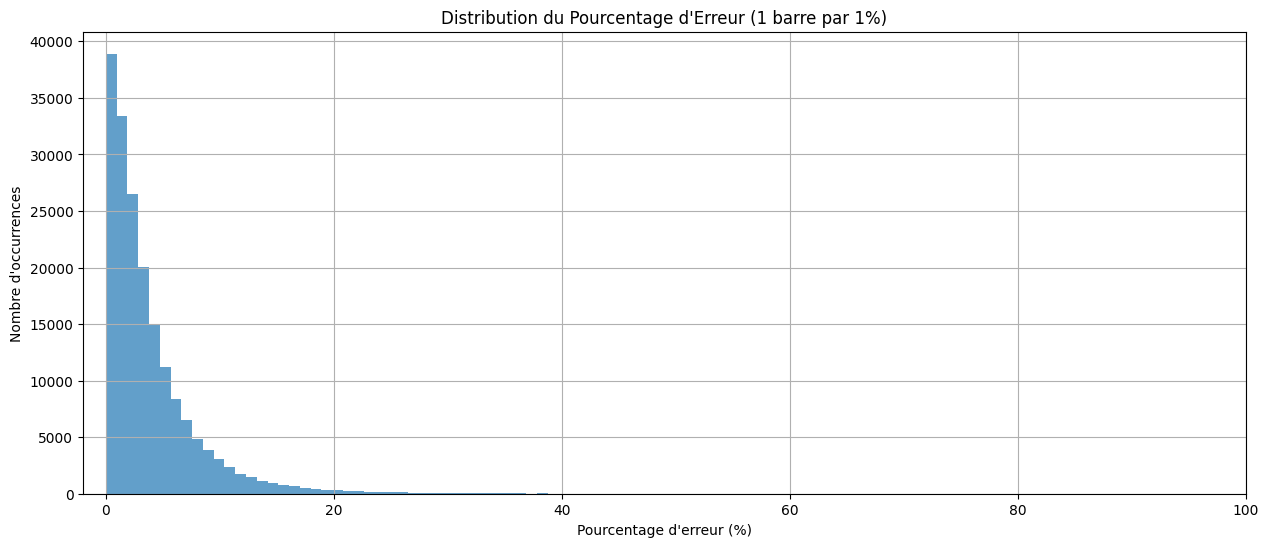

In [53]:
y_pred = forest.predict(X_test)

import matplotlib.pyplot as plt
import numpy as np


y_pred = np.random.normal(loc=y_test, scale=100, size=len(y_test))
y_test_adjusted = y_test  +1e-6

percentage_error = np.abs(y_pred - y_test_adjusted) / y_test_adjusted * 100

plot_data = {
    "Prix_m": percentage_error,
    "Percentage_Error": percentage_error
}


filtre = (percentage_error >= 0) & (percentage_error <= 100)
percentage_error_filtre = percentage_error[filtre]

plt.figure(figsize=(15, 6))
plt.hist(percentage_error_filtre, bins=100, alpha=0.7)
plt.title("Distribution du Pourcentage d'Erreur (1 barre par 1%)")
plt.xlabel("Pourcentage d'erreur (%)")
plt.ylabel("Nombre d'occurrences")
plt.xlim(-2, 100)
plt.grid(True)
plt.show()

In [54]:
from sklearn.metrics import r2_score
y_pred = forest.predict(X_test)

y_test_adjusted = y_test  +1e-6

# Calculer le pourcentage d'erreur
percentage_error_adjusted = np.abs(y_pred - y_test_adjusted) / y_test_adjusted * 100

# Calcul de l'erreur moyenne et médiane
mean_error_adjusted = np.mean(percentage_error_adjusted)
median_error_adjusted = np.median(percentage_error_adjusted)
r2 = r2_score(y_test, y_pred)

print("Erreur moyenne en pourcentage (avec ajustement) :", mean_error_adjusted)
print("Erreur médiane en pourcentage (avec ajustement) :", median_error_adjusted)
print("R^2 Score:", r2)

Erreur moyenne en pourcentage (avec ajustement) : 27.851812090005602
Erreur médiane en pourcentage (avec ajustement) : 16.19237624955682
R^2 Score: 0.7366612481079756


In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = forest.predict(X_test)

y_test_adjusted = y_test  +1e-6

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score:", r2)

Mean Squared Error (MSE): 780801.4678666119
Mean Absolute Error (MAE): 603.4664361439051
R^2 Score: 0.7366612481079756


## AI APLICATION ##

In [56]:
from joblib import load
model_all = load('data/france_entiere.pkl')

In [57]:
def find_nearest_properties_mean(latitude, longitude, model, all_properties, property_type, k=200, max_attempts=5):
    attempt = 0
    mean_price = None

    while attempt < max_attempts:
        # Query the model for nearest properties
        dist, indices = model.query(np.array([[latitude, longitude]]), k=k)

        # Get the nearest properties
        nearest_properties = all_properties.iloc[indices[0]]

        # Filter properties by type
        filtered_properties = nearest_properties[nearest_properties['type_local'] == property_type]

        # Check if there are at least 10 properties
        if len(filtered_properties) >= 10:
            # Calculate average price based on the 10 nearest properties of the specified type
            mean_price = filtered_properties.head(10)['Prix_m'].mean()
            break
        else:
            # Increase k by 100 for the next attempt
            k += 100
            attempt += 1

    return mean_price


In [58]:
def calculate_distance_moyenne(latitude_r, longitude_r, balltree_model):

    point_ref = np.array([[latitude_r, longitude_r]])

    distances, indices = balltree_model.query(point_ref, k=10)

    # Calculer la distance moyenne
    distance_moyenne = np.mean(distances)

    return distance_moyenne


In [59]:
import pandas as pd
import pickle

all_properties = pd.read_csv("data/france_entiere/combined_properties_france.csv")
with open('data/scaler.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

with open('data/model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

with open("data/balltree_model.pkl", 'rb') as file:
    loaded_model = pickle.load(file)



latitude_r = np.deg2rad(44.636693)
longitude_r = np.deg2rad(-1.197042)


Prix_moyen_du_quartier = find_nearest_properties_mean(latitude_r, longitude_r, model_all, all_properties, "Maison")

distance_moyenne = calculate_distance_moyenne(latitude_r, longitude_r, model_all)

surface_reelle_bati =91
surface_terrain = 145
nombre_pieces_principales =  5
p_pop = 26269
number_of_sales = 517

data_for_prediction = {
    'code_departement': [33],
    'surface_reelle_bati': [surface_reelle_bati],
    "nombre_pieces_principales" :[nombre_pieces_principales],
    "surface_terrain": [surface_terrain],
    'latitude_r': [latitude_r],
    'longitude_r': [longitude_r],
    'p_pop': [p_pop],
    'distance_moyenne': [distance_moyenne],
    'Prix_moyen_du_quartier': [Prix_moyen_du_quartier],
    'type_local_Appartement': [0],
    'type_local_Maison': [1],
    'number_of_sales': [number_of_sales]
    
}

new_sample = pd.DataFrame(data_for_prediction)

new_sample_scaled = scaler.transform(new_sample)
predicted_price = model.predict(new_sample_scaled)

print("Predicted Price:", predicted_price[0])
print("Prix du bien",predicted_price*surface_reelle_bati)

c:\Users\arthu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ValueError: X has 12 features, but StandardScaler is expecting 10 features as input.

In [ ]:
all.head()

,valeur_fonciere,code_departement,surface_reelle_bati,nombre_pieces_principales,surface_terrain,Prix_m,latitude_r,longitude_r,p_pop,number_of_sales,distance_moyenne,Prix_moyen_du_quartier
0,60000.0,1,42.0,2.0,0.0,1429,0.796595,0.098218,819.0,19,0.673493,2163.222222
1,490000.0,1,100.0,4.0,883.0,4900,0.797411,0.099465,897.0,30,1.403301,2666.555556
2,116750.0,1,72.0,3.0,0.0,1622,0.797733,0.099175,1133.0,29,0.736173,2816.111111
3,120000.0,1,60.0,3.0,0.0,2000,0.797768,0.100411,959.0,12,0.400588,1932.333333
4,120000.0,1,97.0,3.0,0.0,1237,0.797768,0.100411,959.0,12,0.400588,1932.333333


In [ ]:
Prix_moyen_du_quartier

2672.2

In [ ]:
distance_moyenne

9.059909663675276e-05